In [31]:
import subprocess
import pandas as pd
import matplotlib.pyplot as plt
import PIL
from PIL import Image

In [32]:
reps = 10
gamma = 1
version = 0
resolution = 0

path = "/home/andreas/Documents/Uni/Projekt/team165/Implementierung/"

maxreps = 101

v0data = []
v1data = []
v2data = []

In [33]:
for i in range (1,maxreps):
    resolution = i*100
    img = Image.new('RGB', (resolution, resolution))
    img.save(path + "Input_Images/test.ppm")
    for j in range(0,3):
        version = j
        args = path + "gammaCorr", path + "/Input_Images/test.ppm", "-o", path + "/Result_Images/test1.ppm", "-g", str(gamma), "-b", str(reps), "-v", str(version)
        popen = subprocess.Popen(args, stdout=subprocess.PIPE)
        popen.wait()
        output = popen.stdout.read()
        if(j==0):
            time = output[53:64]
            v0data.append(float(time))
        if(j==1):
            time = output[44:55]
            v1data.append(float(time))
        if(j==2):
            time = output[43:54]
            v2data.append(float(time))
        print("Version " + str(version) + " took " + str(time)[2:13] + " seconds for 10 Repetitions of Image size " + str(resolution) + "x" + str(resolution))

Version 0 took 0.001352164 seconds for 10 Repetitions of Image size 100x100
Version 1 took 0.001253964 seconds for 10 Repetitions of Image size 100x100
Version 2 took 0.001426127 seconds for 10 Repetitions of Image size 100x100
Version 0 took 0.001989691 seconds for 10 Repetitions of Image size 200x200
Version 1 took 0.002238962 seconds for 10 Repetitions of Image size 200x200
Version 2 took 0.001799229 seconds for 10 Repetitions of Image size 200x200
Version 0 took 0.004386009 seconds for 10 Repetitions of Image size 300x300
Version 1 took 0.004971295 seconds for 10 Repetitions of Image size 300x300
Version 2 took 0.003980989 seconds for 10 Repetitions of Image size 300x300
Version 0 took 0.007728493 seconds for 10 Repetitions of Image size 400x400
Version 1 took 0.023187643 seconds for 10 Repetitions of Image size 400x400
Version 2 took 0.007033902 seconds for 10 Repetitions of Image size 400x400
Version 0 took 0.034305274 seconds for 10 Repetitions of Image size 500x500
Version 1 to

[Text(0.5, 0, 'Image Size in 100s'), Text(0, 0.5, 'Time in seconds')]

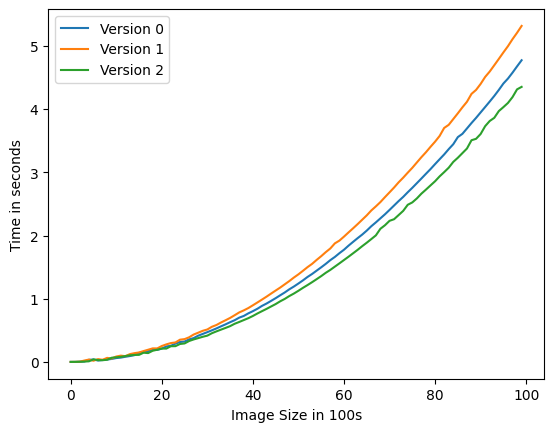

In [34]:
d = {'Version 0': v0data, 'Version 1': v1data, 'Version 2': v2data}
df = pd.DataFrame(data=d)
ax = df.plot()
ax.set(xlabel = "Image Size in 100s", ylabel = "Time in seconds")

In [35]:
ax.get_figure().savefig('sizeplot.png')